# 전처리

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('train.csv')


In [59]:

df.info()   # non-null: 이상치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [60]:
df.describe() 

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.00000,10000.000000,10000.000000
mean,2.163959e+06,0.199300,12.248900,19.879360,1.175265e+06,0.62620,30.889200,0.373200,5.061200e+05,3.649126e+05,22367.28075,744.215000,0.341200
std,1.434430e+06,0.714304,4.620572,7.206693,1.604199e+06,1.23419,20.011561,0.843797,2.831462e+05,3.537942e+05,15186.49738,56.995698,0.474136
min,2.676210e+05,0.000000,2.000000,6.000000,0.000000e+00,0.00000,0.000000,0.000000,2.917650e+04,0.000000e+00,0.00000,502.000000,0.000000
25%,1.311437e+06,0.000000,9.000000,14.600000,4.482476e+05,0.00000,14.000000,0.000000,3.001901e+05,1.471856e+05,10893.75000,704.000000,0.000000
50%,1.743223e+06,0.000000,12.000000,17.950000,7.670910e+05,0.00000,28.000000,0.000000,4.743412e+05,2.547930e+05,20160.00000,756.000000,0.000000
75%,2.447664e+06,0.000000,15.000000,24.100000,1.147283e+06,1.00000,41.000000,0.000000,5.919079e+05,4.749180e+05,30647.25000,793.000000,1.000000
max,1.722975e+07,7.000000,35.000000,51.700000,2.323233e+07,7.00000,88.000000,3.000000,1.373613e+06,3.946300e+06,153574.50000,825.000000,1.000000


In [61]:
Y = df['채무 불이행 여부']
X = df.drop('채무 불이행 여부', axis=1)

print(X)

              UID            주거 형태      연간 소득 현재 직장 근속 연수  체납 세금 압류 횟수  \
0     TRAIN_00000               자가  1941337.5      10년 이상          0.0   
1     TRAIN_00001               월세  1979505.0      10년 이상          0.0   
2     TRAIN_00002               월세  1356381.0          4년          0.0   
3     TRAIN_00003               월세  1049017.5          6년          0.0   
4     TRAIN_00004               월세  4320217.5          2년          0.0   
...           ...              ...        ...         ...          ...   
9995  TRAIN_09995  주택 담보 대출 (거주 중)  1339473.0      10년 이상          0.0   
9996  TRAIN_09996  주택 담보 대출 (거주 중)  2297230.5          2년          0.0   
9997  TRAIN_09997  주택 담보 대출 (거주 중)  1221523.5      10년 이상          0.0   
9998  TRAIN_09998               자가  3343584.0      10년 이상          0.0   
9999  TRAIN_09999  주택 담보 대출 (거주 중)  2175133.5          5년          0.0   

      개설된 신용계좌 수  신용 거래 연수   최대 신용한도  신용 문제 발생 횟수  마지막 연체 이후 경과 개월 수  \
0              9      13.4  400597.5   

### Normal Distribute 시각화
- 고른 분포
- 이상치 판별 어려움

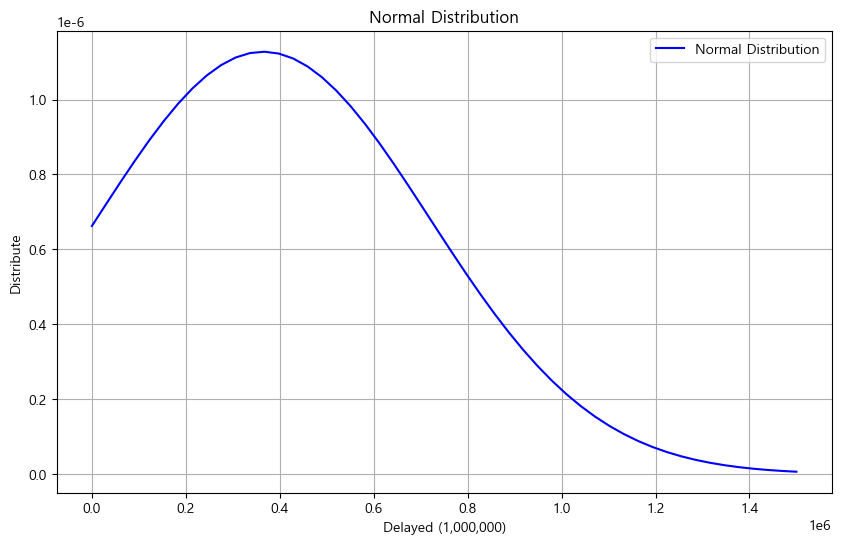

In [62]:
from scipy.stats import norm
X2 = df['현재 미상환 신용액']

mu = X2.sum() / len(X2)  # 평균
sigma = X2.std()  # 표준편차

# x 축의 값 범위 설정
x = np.linspace(0, 1500000)

# 확률 밀도 함수 계산
y = norm.pdf(x, loc=mu, scale=sigma)
# y = amount

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.title('Normal Distribution')
plt.xlabel('Delayed (1,000,000)')
plt.ylabel('Distribute')
plt.grid(True)
plt.legend()
plt.show()


### IQR 그래프
- 현재 대출 잔액	
- 현재 미상환 신용액	
- 월 상환 부채액	

In [63]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font)

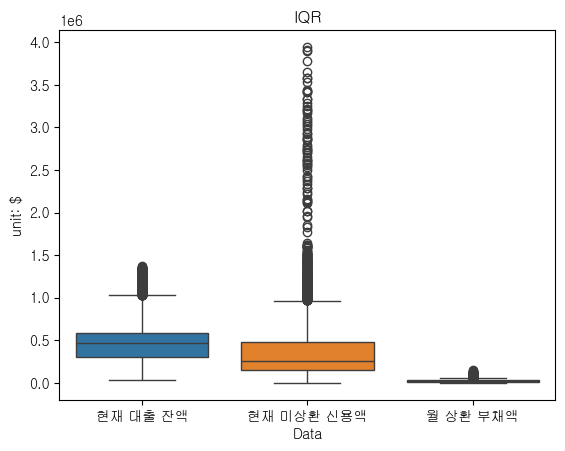

In [64]:
box_plot = sns.boxplot(data=df[['현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액']])
for patch in box_plot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
    x = patch.get_x()
    y = patch.get_y()
    width = patch.get_width()
    height = patch.get_height()
    box_plot.text(x+width/2, y+height/2, "{:.2f}".format(height), ha='center', va='center')
plt.title('IQR')
plt.xlabel('Data')
plt.ylabel('unit: $')

plt.show()


### 히트맵
- 큰 상관관계의 데이터 없음 -> 데이터 칼럼 안 묶어도 됨

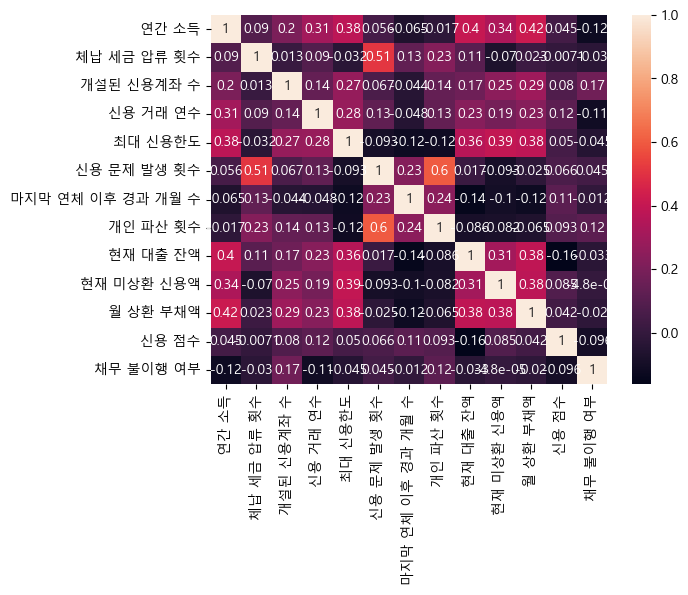

In [65]:
import matplotlib.font_manager as fm

corr_matrix = df.corr(numeric_only = True) # 컬럼들 간의 상관관계 - 피어슨의 상관계수 / numeric_only : 숫자형 데이터만 사용
corr_matrix

# 한글 폰트 경로 찾기 (예: Windows에서 기본 한글 폰트 경로)
font_path = "C:\\Windows\\Fonts\\malgun.ttf"  # Malgun Gothic 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# 그래프에서 한글 폰트 적용
plt.rcParams["font.family"] = font_prop.get_name()


sns.heatmap(corr_matrix, annot=True) # 히트맵
plt.show()

# 전처리

- 라벨 인코딩
- '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액' : 금액이므로 다른 데이터들에 비해 값이 큼, 로그치환/정규화 필요?

In [66]:
# X 라벨 인코딩

from sklearn.preprocessing import LabelEncoder
def encode_feature(df):
    
    categories = ['주거 형태', '현재 직장 근속 연수', '대출 목적', '대출 상환 기간']
    for cate_item in categories:
        label_encoder = LabelEncoder()
        df[cate_item] = label_encoder.fit_transform(df[cate_item])
    
    return df
    
encode_feature(X)
print(X)


              UID  주거 형태      연간 소득  현재 직장 근속 연수  체납 세금 압류 횟수  개설된 신용계좌 수  \
0     TRAIN_00000      1  1941337.5            0          0.0           9   
1     TRAIN_00001      0  1979505.0            0          0.0           5   
2     TRAIN_00002      0  1356381.0            5          0.0          12   
3     TRAIN_00003      0  1049017.5            7          0.0          15   
4     TRAIN_00004      0  4320217.5            3          0.0          11   
...           ...    ...        ...          ...          ...         ...   
9995  TRAIN_09995      2  1339473.0            0          0.0           9   
9996  TRAIN_09996      2  2297230.5            3          0.0          11   
9997  TRAIN_09997      2  1221523.5            0          0.0           9   
9998  TRAIN_09998      1  3343584.0            0          0.0          10   
9999  TRAIN_09999      2  2175133.5            6          0.0           5   

      신용 거래 연수   최대 신용한도  신용 문제 발생 횟수  마지막 연체 이후 경과 개월 수  개인 파산 횟수  대출 목적  

In [68]:
# # '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액' 정규 분포화 : 다른 컬럼에 비해 너무 큰 값

# from scipy import stats
# columns = ['현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액']
# for column in columns:
#     tran_data, lambda_value = stats.boxcox(X[column])
#     X[f'{column}_boxcox'] = tran_data

cl = ['현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액']
# print(X)
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

for i in cl:
    df[i] = std_scaler.fit_transform(df[[i]])

df


,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,-0.406937,-0.394190,-0.892995,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1.752060,-0.848456,0.170833,767,0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,-0.983092,0.346918,-0.678155,800,1
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,-0.899709,0.136522,0.617798,796,1
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,2.320671,-0.808197,-1.086894,751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TRAIN_09995,주택 담보 대출 (거주 중),1339473.0,10년 이상,0.0,9,18.7,319027.5,0,68,0,부채 통합,단기 상환,-1.341791,-0.531081,-1.062199,755,0
9996,TRAIN_09996,주택 담보 대출 (거주 중),2297230.5,2년,0.0,11,28.3,399799.5,0,7,0,주택 개보수,장기 상환,-0.474030,-0.049362,2.037024,707,0
9997,TRAIN_09997,주택 담보 대출 (거주 중),1221523.5,10년 이상,0.0,9,30.1,823305.0,0,14,0,부채 통합,장기 상환,1.284263,-0.531429,-0.719839,733,0
9998,TRAIN_09998,자가,3343584.0,10년 이상,0.0,10,20.3,724314.0,0,25,0,부채 통합,단기 상환,-0.222905,-0.637742,0.210738,696,0


In [ ]:
# 한글 폰트 설정 (한글을 지원하는 폰트로 변경)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 또는 '맑은 고딕'
matplotlib.rcParams['axes.unicode_minus'] = False  # 음수 기호 문제 해결

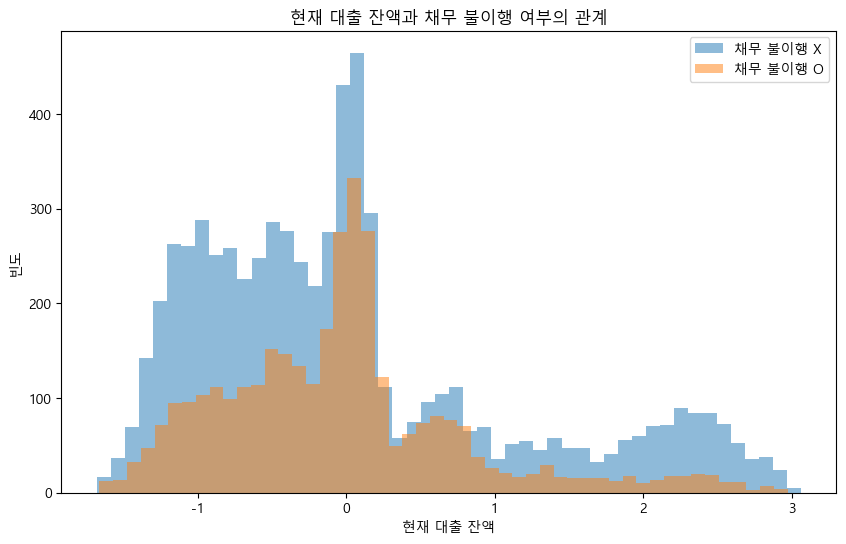

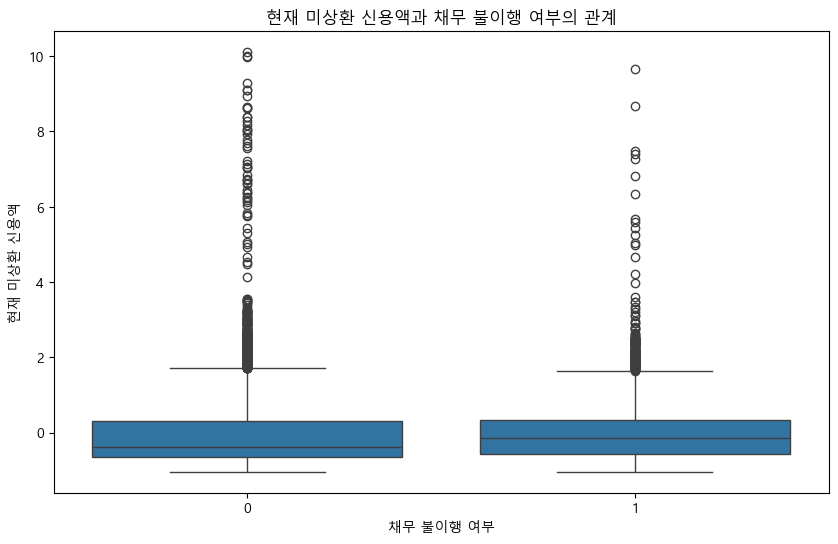

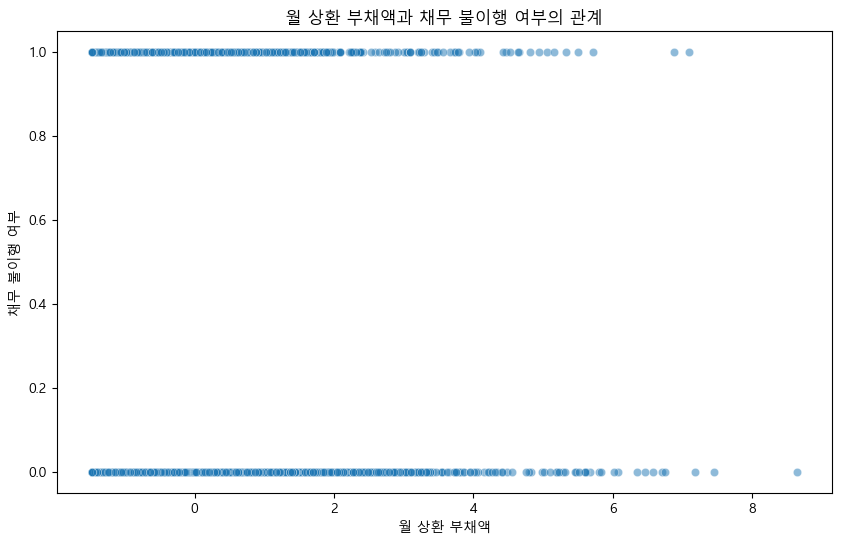

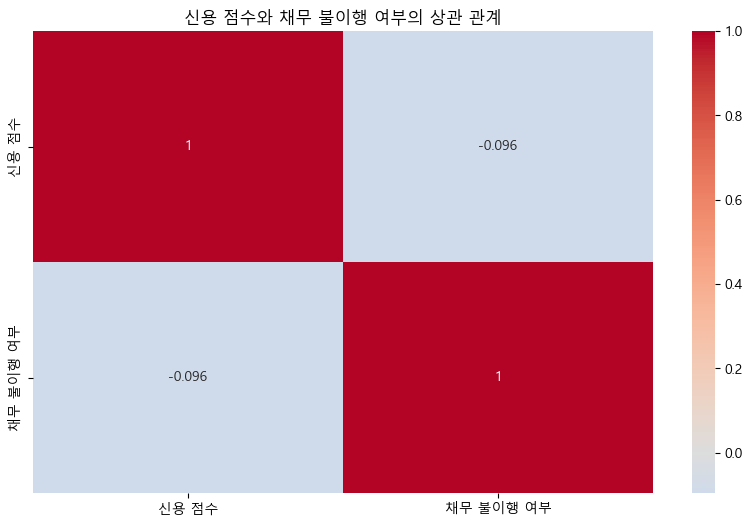

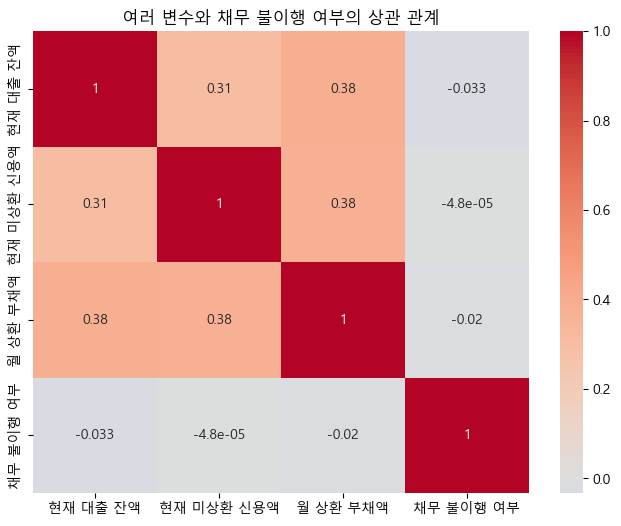

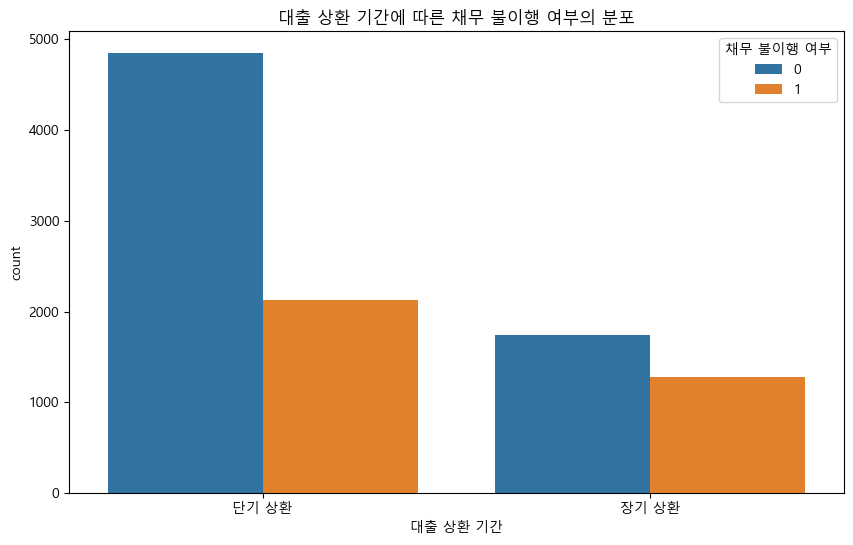

<Figure size 1200x800 with 0 Axes>

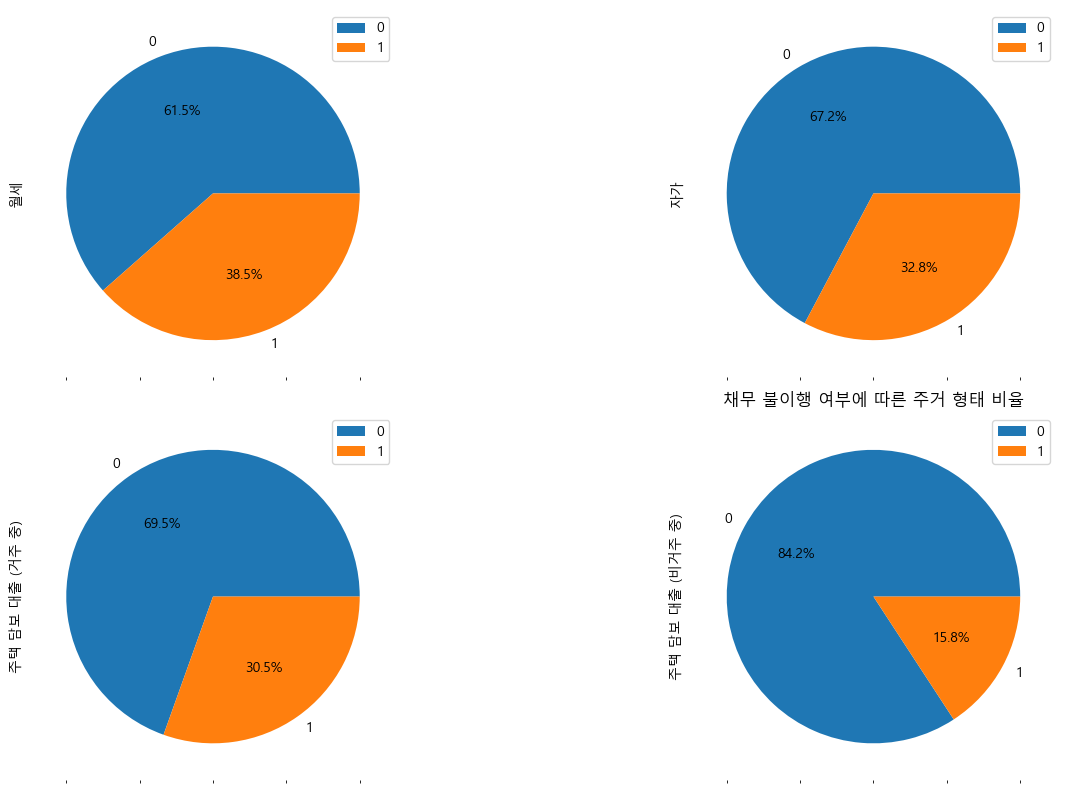

<Figure size 1200x800 with 0 Axes>

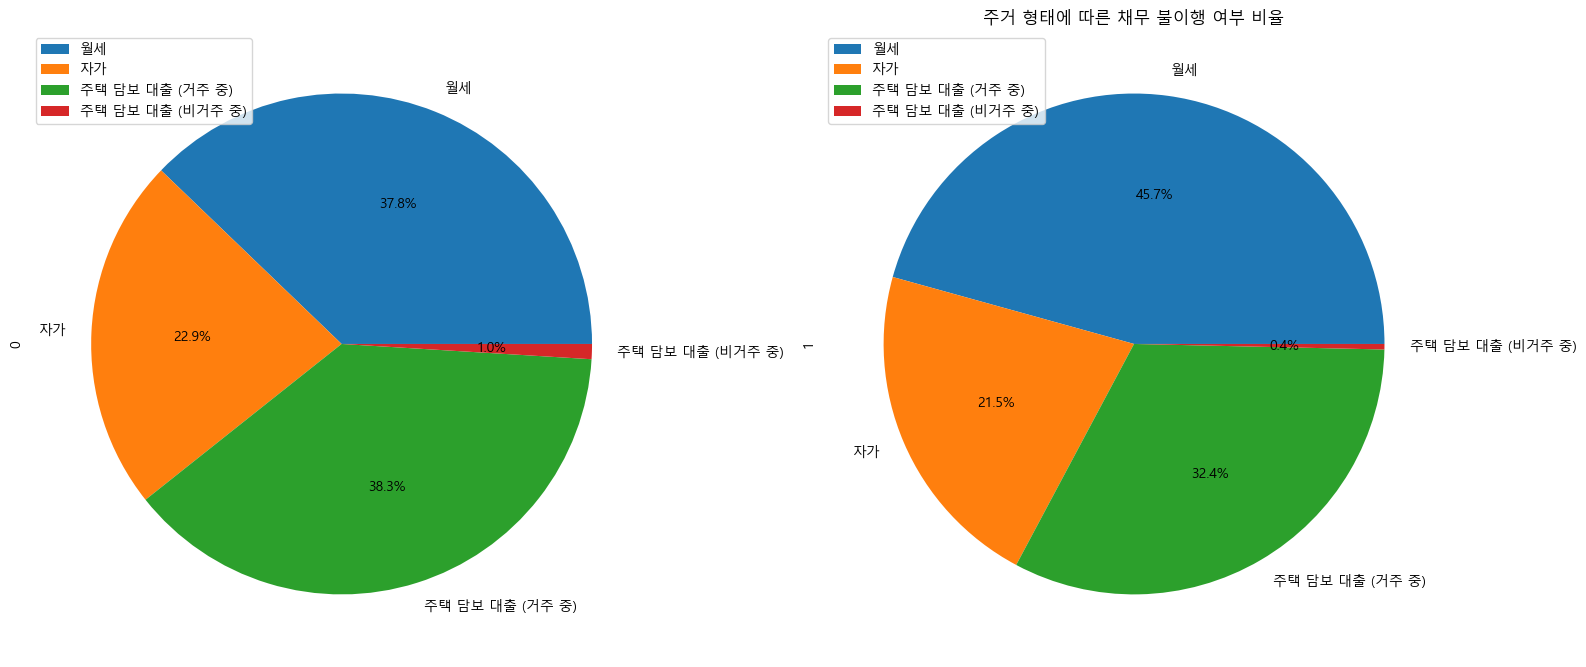

In [86]:
# 채무 불이행 여부에 관한 


# 원 핫 인코딩
categories = ['주거 형태', '현재 직장 근속 연수', '대출 목적', '대출 상환 기간']


df_dummies = pd.get_dummies(df, columns = categories, dtype=int) 

df_dummies

# 1. '현재 대출 잔액'과 '채무 불이행 여부' 간의 관계 (히스토그램)
plt.figure(figsize=(10, 6))
plt.hist(df[df['채무 불이행 여부'] == 0]['현재 대출 잔액'], bins=50, alpha=0.5, label='채무 불이행 X')
plt.hist(df[df['채무 불이행 여부'] == 1]['현재 대출 잔액'], bins=50, alpha=0.5, label='채무 불이행 O')
plt.xlabel('현재 대출 잔액')
plt.ylabel('빈도')
plt.title('현재 대출 잔액과 채무 불이행 여부의 관계')
plt.legend()
plt.show()

# 2. '현재 미상환 신용액'과 '채무 불이행 여부' 간의 관계 (박스플롯)
plt.figure(figsize=(10, 6))
sns.boxplot(x='채무 불이행 여부', y='현재 미상환 신용액', data=df)
plt.title('현재 미상환 신용액과 채무 불이행 여부의 관계')
plt.show()

# 3. '월 상환 부채액'과 '채무 불이행 여부' 간의 관계 (산점도)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='월 상환 부채액', y='채무 불이행 여부', data=df, alpha=0.5)
plt.title('월 상환 부채액과 채무 불이행 여부의 관계')
plt.xlabel('월 상환 부채액')
plt.ylabel('채무 불이행 여부')
plt.show()

# 4. '신용 점수'와 '채무 불이행 여부' 간의 상관 관계 (히트맵)
plt.figure(figsize=(10, 6))
correlation = df[['신용 점수', '채무 불이행 여부']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('신용 점수와 채무 불이행 여부의 상관 관계')
plt.show()

# 5. 여러 변수의 '채무 불이행 여부'에 대한 상관 관계 (상관 계수 차트)
correlation = df[['현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '채무 불이행 여부']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('여러 변수와 채무 불이행 여부의 상관 관계')
plt.show()

# 6. '대출 상환 기간'에 따른 '채무 불이행 여부'의 분포 (막대차트)
plt.figure(figsize=(10, 6))
sns.countplot(x='대출 상환 기간', hue='채무 불이행 여부', data=df)
plt.title('대출 상환 기간에 따른 채무 불이행 여부의 분포')
plt.show()

# 7. '주거 형태'에 따른 '채무 불이행 여부' (파이 차트)
plt.figure(figsize=(12, 8))
df.groupby(['채무 불이행 여부', '주거 형태']).size().unstack().plot(
    kind='pie', 
    subplots=True, 
    layout=(2, 2),  # 서브플롯 개수를 늘림
    figsize=(16, 8),  # 그래프 크기 키움
    autopct='%1.1f%%',  # 비율 표시
    legend=True
)
plt.title('채무 불이행 여부에 따른 주거 형태 비율')
plt.tight_layout()  # 레이아

# 7. '주거 형태'에 따른 '채무 불이행 여부' (파이 차트)
plt.figure(figsize=(12, 8))
df.groupby(['주거 형태', '채무 불이행 여부']).size().unstack().plot(
    kind='pie', 
    subplots=True, 
    layout=(1, 2), 
    figsize=(16, 8),  # 그래프 크기 키움
    autopct='%1.1f%%',  # 비율 표시
    legend=True
)
plt.title('주거 형태에 따른 채무 불이행 여부 비율')
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()



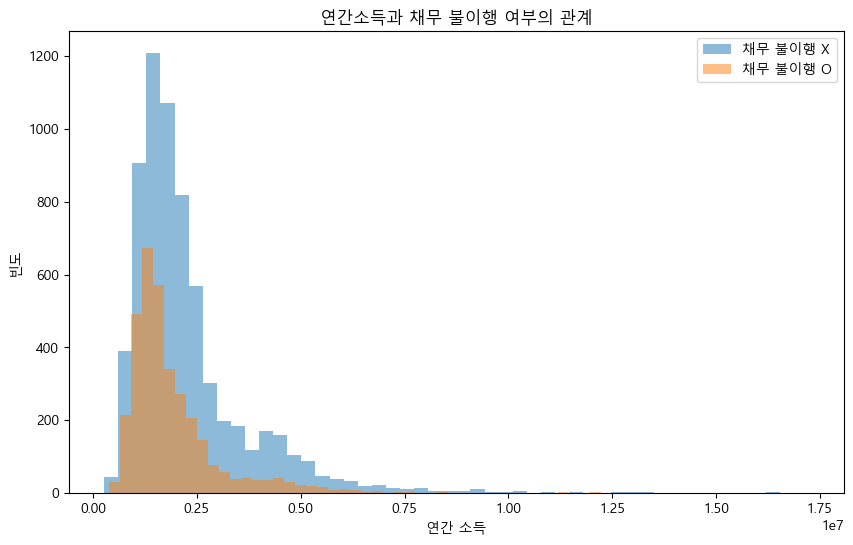

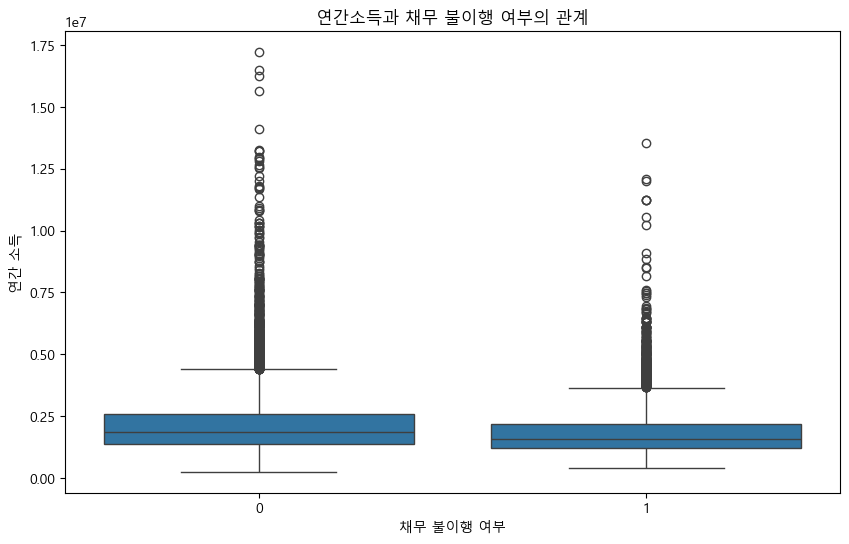

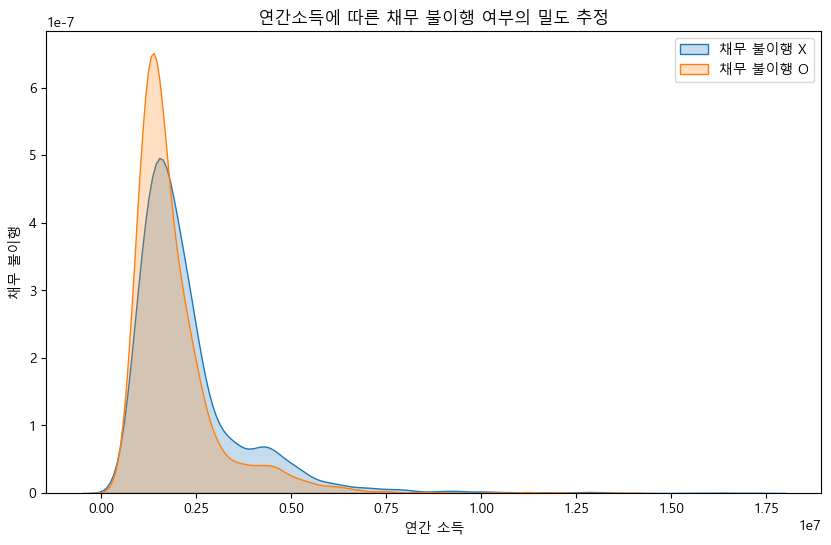

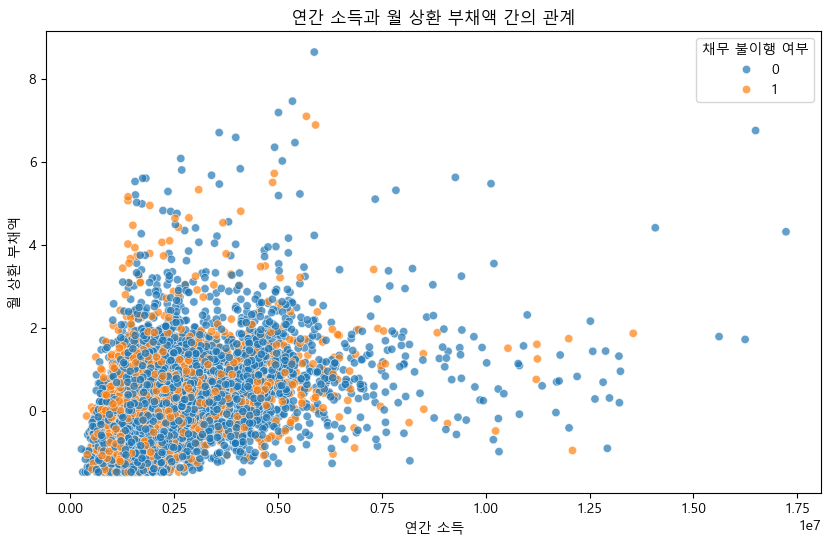

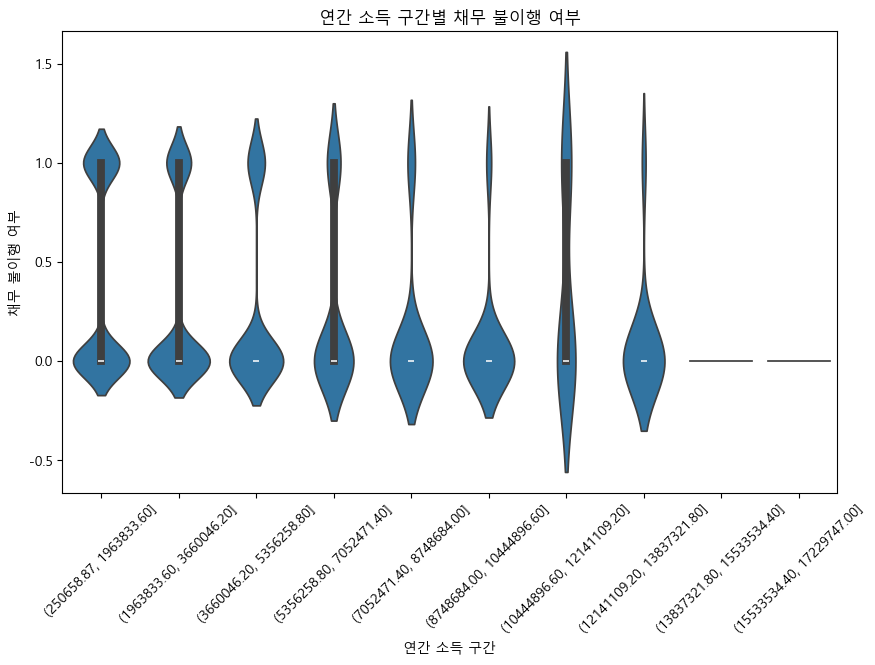

In [84]:
# 1. '연간소득'과 '채무 불이행 여부' 간의 관계 (히스토그램)
plt.figure(figsize=(10, 6))
plt.hist(df[df['채무 불이행 여부'] == 0]['연간 소득'], bins=50, alpha=0.5, label='채무 불이행 X')
plt.hist(df[df['채무 불이행 여부'] == 1]['연간 소득'], bins=50, alpha=0.5, label='채무 불이행 O')
plt.xlabel('연간 소득')
plt.ylabel('빈도')
plt.title('연간소득과 채무 불이행 여부의 관계')
plt.legend()
plt.show()

# 2. '연간소득'과 '채무 불이행 여부' 간의 관계 (박스플롯)
plt.figure(figsize=(10, 6))
sns.boxplot(x='채무 불이행 여부', y='연간 소득', data=df)
plt.title('연간소득과 채무 불이행 여부의 관계')
plt.show()

# 3. '연간소득'과 '채무 불이행 여부' 간의 관계 (커널 밀도 추정, KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['채무 불이행 여부'] == 0]['연간 소득'], label='채무 불이행 X', fill=True)
sns.kdeplot(df[df['채무 불이행 여부'] == 1]['연간 소득'], label='채무 불이행 O', fill=True)
plt.xlabel('연간 소득')
plt.ylabel('채무 불이행')
plt.title('연간소득에 따른 채무 불이행 여부의 밀도 추정')
plt.legend()
plt.show()

# 연간 소득과 다른 변수(예: 월 상환 부채액) 간의 관계를 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='연간 소득', y='월 상환 부채액', hue='채무 불이행 여부', data=df, alpha=0.7)
plt.title('연간 소득과 월 상환 부채액 간의 관계')
plt.xlabel('연간 소득')
plt.ylabel('월 상환 부채액')
plt.show()

# 연간 소득을 구간별로 나누고, 각 구간을 소수점 2자리까지 표시하도록 수정
plt.figure(figsize=(10, 6))

# 연간 소득을 구간으로 나누기
df['연간 소득 구간'] = pd.cut(df['연간 소득'], bins=10)

# 연간 소득 구간을 소수점 두 자릿수로 포맷팅
df['연간 소득 구간'] = df['연간 소득 구간'].apply(lambda x: f'({x.left:.2f}, {x.right:.2f}]')

# 바이올린 플롯
sns.violinplot(x='연간 소득 구간', y='채무 불이행 여부', data=df)
plt.title('연간 소득 구간별 채무 불이행 여부')
plt.xticks(rotation=45)  # x축 레이블 회전 (겹침 방지)
plt.show()


In [78]:
# 데이터프레임의 컬럼 이름 확인
print(df.columns)


Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')


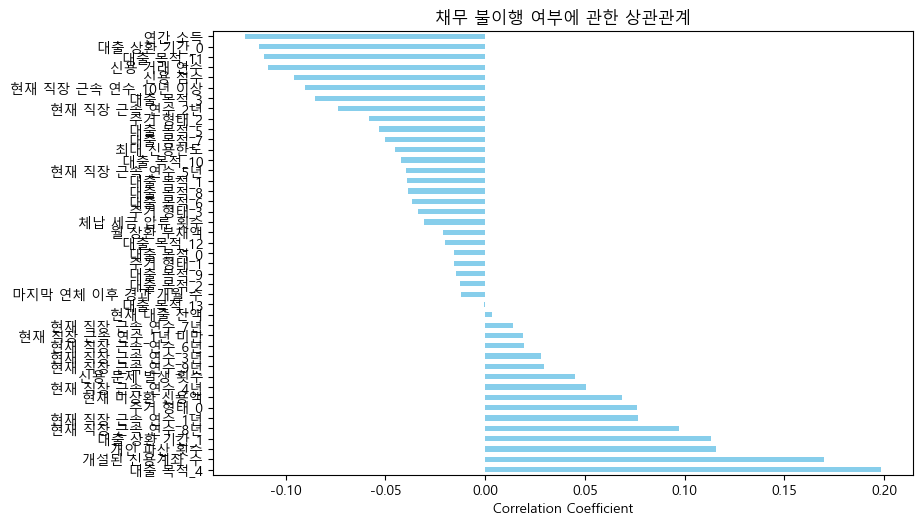

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정 (한글을 지원하는 폰트로 변경)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕' 폰트 사용
matplotlib.rcParams['axes.unicode_minus'] = False  # 음수 기호 문제 해결

# 원-핫 인코딩된 데이터에서 숫자형 열만 선택
df_numeric = df_dummies.select_dtypes(include=['number'])  
# df_dummies에서 숫자형 데이터만 선택하여 df_numeric에 저장

# 숫자형 열에 대해서 상관계수 계산
correlation_with_target = df_numeric.corr()['채무 불이행 여부'].sort_values(ascending=False)  
# df_numeric에서 '채무 불이행 여부'와 다른 숫자형 변수 간의 상관계수 계산 후 내림차순으로 정렬

# 상관계수 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
correlation_with_target.drop('채무 불이행 여부').plot(kind='barh', color='skyblue')  
# '채무 불이행 여부'를 제외한 변수들에 대해 수평 막대그래프 그리기
# 색상은 'skyblue'로 설정

plt.xlabel('상관계수')  # x축 레이블 설정

# 그래프 제목 설정
plt.title('채무 불이행 여부에 관한 상관관계')  

plt.tight_layout()  # 레이아웃을 자동으로 조정하여 그래프의 요소들이 겹치지 않게 만듦

# x축 레이블 간격을 넓히기 위해 하단 여백을 조정
plt.subplots_adjust(left=0.2, right=0.9, bottom=0.2)
plt.show()  # 그래프 화면에 표시


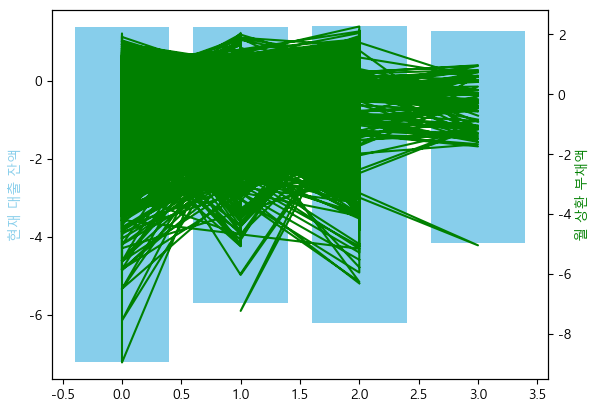

In [50]:
# 데이터프레임에 '주거 형태'와 관련된 숫자형 열을 사용하여 시각화 예시
fig, ax1 = plt.subplots()

# 예시로 '현재 대출 잔액' 열을 사용
ax1.bar(df['주거 형태'], df['현재 대출 잔액'], color='skyblue')
ax1.set_ylabel('현재 대출 잔액', color='skyblue')

ax2 = ax1.twinx()
ax2.plot(df['주거 형태'], df['월 상환 부채액'], color='green')
ax2.set_ylabel('월 상환 부채액', color='green')

plt.show()



In [32]:
# 로그
cl = ['현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액']

for i in cl:
    df[i] = df[i].apply(lambda x: np.log1p(x))


df

C:\Users\user\AppData\Local\Temp\ipykernel_3272\3062338896.py:5: RuntimeWarning: invalid value encountered in log1p
  df[i] = df[i].apply(lambda x: np.log1p(x))


,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,-0.522455,-0.501189,-2.234875,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1.012350,-1.886876,0.157715,767,0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,-4.079994,0.297819,-1.133685,800,1
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,-2.299680,0.127973,0.481066,796,1
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1.200167,-1.651287,NaN,751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TRAIN_09995,주택 담보 대출 (거주 중),1339473.0,10년 이상,0.0,9,18.7,319027.5,0,68,0,부채 통합,단기 상환,NaN,-0.757326,NaN,755,0
9996,TRAIN_09996,주택 담보 대출 (거주 중),2297230.5,2년,0.0,11,28.3,399799.5,0,7,0,주택 개보수,장기 상환,-0.642510,-0.050622,1.110878,707,0
9997,TRAIN_09997,주택 담보 대출 (거주 중),1221523.5,10년 이상,0.0,9,30.1,823305.0,0,14,0,부채 통합,장기 상환,0.826043,-0.758068,-1.272389,733,0
9998,TRAIN_09998,자가,3343584.0,10년 이상,0.0,10,20.3,724314.0,0,25,0,부채 통합,단기 상환,-0.252192,-1.015399,0.191230,696,0


              Feature  Importance
1               연간 소득    0.061646
12         현재 미상환 신용액    0.057803
11           현재 대출 잔액    0.056460
14              신용 점수    0.053884
3          개설된 신용계좌 수    0.053305
...               ...         ...
7314  UID_TRAIN_07300    0.000000
3759  UID_TRAIN_03745    0.000000
2159  UID_TRAIN_02145    0.000000
3756  UID_TRAIN_03742    0.000000
9952  UID_TRAIN_09938    0.000000

[10024 rows x 2 columns]


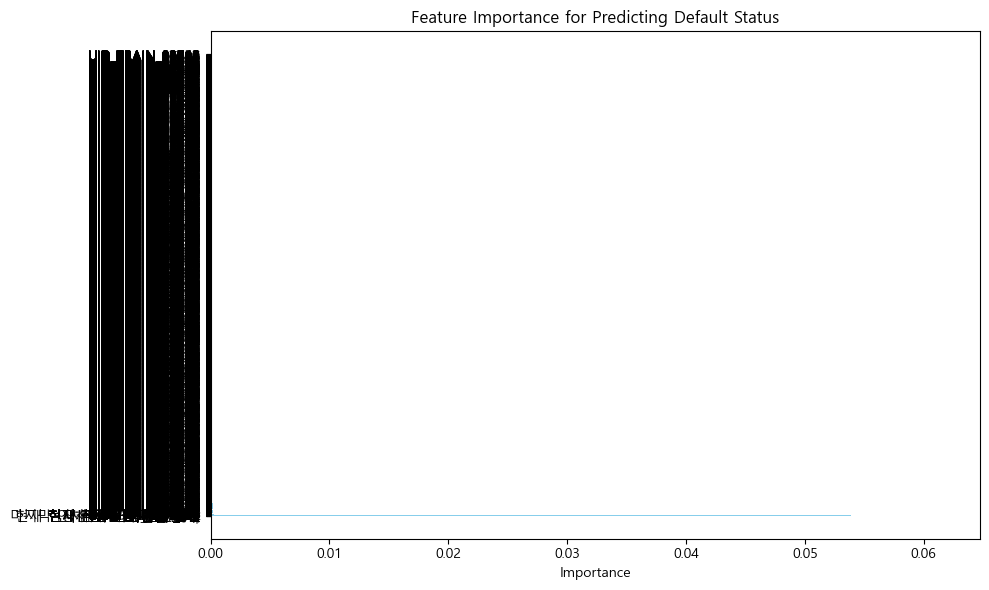

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 채무 불이행 여부 컬럼을 종속 변수로 설정하고, 나머지 변수들을 독립 변수로 설정
X = df.drop(columns=['채무 불이행 여부'])
y = df['채무 불이행 여부']

# 데이터 타입에 맞게 전처리
# object형 변수를 one-hot 인코딩 처리 (주거 형태, 대출 목적, 대출 상환 기간)
X = pd.get_dummies(X, drop_first=True)

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier 모델 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 특성 중요도 추출
importances = model.feature_importances_

# 중요도를 데이터프레임으로 정리
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# 중요도 순으로 정렬
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 결과 출력
print(feature_importance)

# 막대차트로 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting Default Status')

# 차트가 겹치지 않게 조정
plt.tight_layout()

# 차트 표시
plt.show()
